# Loss Curves for Neural Networks
**Objectives**
- Analyze and interpret training and testing loss curves for tabular data.
- Identify common training issues such as overfitting, underfitting, and instability.
- Experiment with model hyperparameters and training parameters to improve performance.


---

The **UCI Adult Income dataset** is a tabular dataset used for binary classification tasks. The goal is to predict whether an individual's income exceeds $50,000 per year based on census data.

**Details**:
- **Features:** 14 attributes (e.g., age, education, occupation).
- **Target:** Binary class (income >50K or <=50K).
- **Size:** 32,561

**Main Tasks**:
1. Load and preprocess the dataset.
2. Split it into a training and test set.
3. Train a neural network and analyze the training/test loss curves.
4. Perform experiments to understand how model capacity and learning rate impact performance.


----

## Part 1: Data Preparation

Objectives:
1. Load the dataset using `pandas`.
2. Split the data into a training and test set (say, 90%/10%)
3. Prepare data for training and inference by adequately handling missing values, categorical features, and normalizing the data.



In [14]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

df = pd.read_csv(url, names=columns, sep=',\s*', engine='python', na_values="NA")

In [15]:
import numpy as np
def analyze_df(df, target_col=None):
    print(f"Data shape: {df.shape}\n")
    print("df.info():\n")
    print(df.info())
    print("\ndf.head():\n")
    print(df.head())
    print("\ndf.describe():\n")
    print(df.describe())
    print("\ndf.describe(include=['category', 'object']):\n")
    print(df.describe(include=['category', 'object']))
    print("\nCorrelation matrix:\n")
    print(df.corr(numeric_only=True))
    missing_values = df.isnull().sum()
    print("\nMissing values per column:\n")
    print(missing_values)
    print("\nPercentage of missing values per column:\n")
    print(missing_values / len(df) * 100)
    print("\nUnique values per column:\n")
    print(df.nunique())
    print("\nValue counts for categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}:\n{df[col].value_counts()}\n")
    print("Mode of categorical columns:\n")
    print(df.select_dtypes(include=['category', 'object']).mode())
    print("\nMost frequent category in categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}: {df[col].mode().values[0]}, count: {df[col].value_counts().values[0]}")
    print("\nLeast frequent category in categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}: {df[col].value_counts().idxmin()}, count: {df[col].value_counts().values[-1]}")
    print("\nRange of numerical columns:\n")
    for col in df.select_dtypes(include=np.number).columns:
        print(f"{col}: {df[col].min()} - {df[col].max()}")
    print("\nSkewness of numerical columns:\n")
    print(df.select_dtypes(include=np.number).skew())
    print("\nKurtosis of numerical columns:\n")
    print(df.select_dtypes(include=np.number).kurt())
    print("\nOutliers in numerical columns:\n")
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f"{col}: {((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()} outliers")
    print("\nDuplicated rows:\n")
    print(df.duplicated().sum())
    if target_col:
        print(f"\nDistribution of target variable ({target_col}):\n")
        print(df[target_col].value_counts())

analyze_df(df, target_col="income")

Data shape: (32561, 15)

df.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

df.head():

   age         workclass  fnlwgt  educ

In [16]:
pd.set_option('display.max_columns', 120)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
######## Data Preparation ########
# rename ? labels to Unknown in columns: workclass, occupation, native-country
df.replace('?', 'Unknown', inplace=True)

# drop fnlwgt
df.drop(columns=['fnlwgt'], inplace=True)

# onehot encode categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.to_list()
df = pd.get_dummies(df, columns=categorical_features, dtype=int, drop_first=True)

######## Data Split ########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['income_>50K']), 
                                                    df['income_>50K'], 
                                                    test_size=0.1, 
                                                    random_state=42)

######## Data Normalization ########
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

######## Deeplearning Preparations ########
# Convert to Tensor
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Available device: {device}")
print("CUDA device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

X_train = torch.from_numpy(X_train.values).type(torch.FloatTensor).to(device)
X_test = torch.from_numpy(X_test.values).type(torch.FloatTensor).to(device)
y_train = torch.from_numpy(y_train.values).type(torch.FloatTensor).to(device).reshape([-1, 1])
y_test = torch.from_numpy(y_test.values).type(torch.FloatTensor).to(device).reshape([-1, 1])

# Create training and test sets
training_set = list(zip(X_train, y_train))
test_set = list(zip(X_test, y_test))

Available device: cuda
CUDA device name: NVIDIA GeForce RTX 2070 SUPER


---

## Part 2: Build and Train the Model

**Initial Model Architecture**:


- *Input layer:* Size matches the number of features after encoding.
- *Hidden layers:*
  - Hidden Layer 1: 8 units, ReLU activation.
  - Hidden Layer 2: 8 units, ReLU activation.
- *Output layer:* 1 unit (binary classification), Sigmoid activation.


**Loss Function and Optimizer**:
- Loss: Binary Cross-Entropy Loss (`BCELoss`).
- Optimizer: SGD with a learning rate of 0.001.

**Training**:
- Train the model for 20 epochs.
- Record (store) the training and test losses at each epoch.


In [5]:
len(training_set[0][0])

99

In [6]:
# your code here
# hint: recall how we did this previously
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(x)
        return x
        

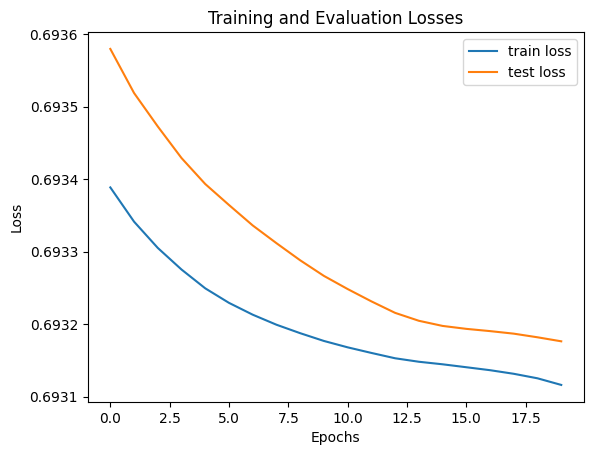

In [7]:
import torch.nn.functional as F

from torch.optim import SGD
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

input_size = len(training_set[0][0])  # 99
batch_size = 16

epochs = 20                     # default = 20
learning_rate = 0.001           # default = 0.001
 
# ----------------------------------------------------------------------------------------------------------------
#    initera modell, loss_function, optimizer & dataloader


model = Net(input_size)
model = model.to(device)

optimizer = SGD(model.parameters(), lr = learning_rate)
loss_function = torch.nn.BCELoss()
train_dataloader = DataLoader(training_set,                 
                              batch_size = batch_size,       
                              shuffle=True)


# ----------------------------------------------------------------------------------------------------------------
#    träna



batch_train_losses = []

epoch_train_losses = []
epoch_evaluation_losses = []

for i in range(epochs):
    
    model.train()

    running_loss = 0
    
    for batch in train_dataloader:
        y_true = batch[1]
        input_features = batch[0]

        y_pred=model(input_features)
        loss=loss_function(y_pred, y_true)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        batch_loss = loss.item()
        batch_train_losses.append(batch_loss)
    
    epoch_average_loss = np.average(batch_train_losses[-len(train_dataloader):])

    epoch_train_losses.append(epoch_average_loss)

# ----------------------------------------------------------------------------------------------------------------
#   evalueringssektion 

    model.eval()
    
    y_true = y_test
    input_features = X_test
    
    y_pred = model(input_features)
    loss = loss_function(y_pred, y_true)
    
    evaluation_loss = loss.item()
    epoch_evaluation_losses.append(evaluation_loss)

# ----------------------------------------------------------------------------------------------------------------
#   plotta resultat 

plt.plot(epoch_train_losses, label = 'train loss')
plt.plot(epoch_evaluation_losses, label = 'test loss')
plt.legend()

# axis labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Evaluation Losses')

plt.show()

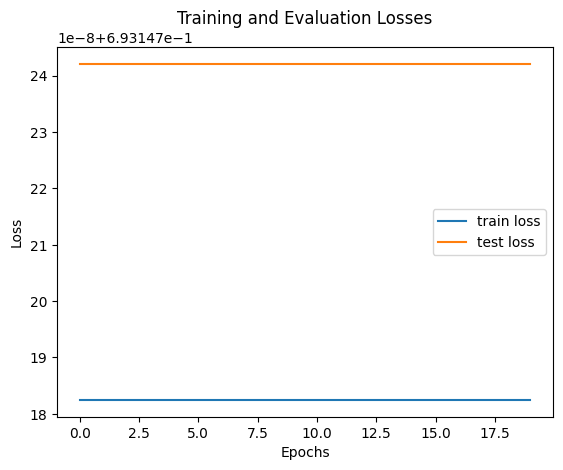

In [26]:
import torch.nn.functional as F

from torch.optim import SGD
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

input_size = len(training_set[0][0])  # 99
batch_size = 16

epochs = 20                     # default = 20
learning_rate = 0.001           # default = 0.001
 
# ----------------------------------------------------------------------------------------------------------------
#    initera modell, loss_function, optimizer & dataloader


model = Net(input_size)
model = model.to(device)

optimizer = SGD(model.parameters(), lr = learning_rate)
loss_function = torch.nn.BCELoss()
train_dataloader = DataLoader(training_set,                 
                              batch_size = batch_size,       
                              shuffle=True)


# ----------------------------------------------------------------------------------------------------------------
#    träna



batch_train_losses = []

epoch_train_losses = []
epoch_evaluation_losses = []

for i in range(epochs):
    
    model.train()

    running_loss = 0
    
    for batch in train_dataloader:
        y_true = batch[1]
        input_features = batch[0]

        y_pred=model(input_features)
        loss=loss_function(y_pred, y_true)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        batch_loss = loss.item()
        batch_train_losses.append(batch_loss)
    
    epoch_average_loss = np.average(batch_train_losses[-len(train_dataloader):])

    epoch_train_losses.append(epoch_average_loss)

# ----------------------------------------------------------------------------------------------------------------
#   evalueringssektion 

    model.eval()
    
    y_true = y_test
    input_features = X_test
    
    y_pred = model(input_features)
    loss = loss_function(y_pred, y_true)
    
    evaluation_loss = loss.item()
    epoch_evaluation_losses.append(evaluation_loss)

# ----------------------------------------------------------------------------------------------------------------
#   plotta resultat 

plt.plot(epoch_train_losses, label = 'train loss')
plt.plot(epoch_evaluation_losses, label = 'test loss')
plt.legend()

# axis labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Evaluation Losses')

plt.show()

Train Epoch: 1 [0/29304 (0%)]	Loss: 11.437766
Train Epoch: 1 [160/29304 (1%)]	Loss: 11.229589
Train Epoch: 1 [320/29304 (1%)]	Loss: 11.209473
Train Epoch: 1 [480/29304 (2%)]	Loss: 11.138556
Train Epoch: 1 [640/29304 (2%)]	Loss: 11.093992
Train Epoch: 1 [800/29304 (3%)]	Loss: 11.238601
Train Epoch: 1 [960/29304 (3%)]	Loss: 11.029280
Train Epoch: 1 [1120/29304 (4%)]	Loss: 11.090355
Train Epoch: 1 [1280/29304 (4%)]	Loss: 11.074173
Train Epoch: 1 [1440/29304 (5%)]	Loss: 11.087687
Train Epoch: 1 [1600/29304 (5%)]	Loss: 11.097668
Train Epoch: 1 [1760/29304 (6%)]	Loss: 11.090355
Train Epoch: 1 [1920/29304 (7%)]	Loss: 11.098116
Train Epoch: 1 [2080/29304 (7%)]	Loss: 11.090355
Train Epoch: 1 [2240/29304 (8%)]	Loss: 11.038948
Train Epoch: 1 [2400/29304 (8%)]	Loss: 11.169795
Train Epoch: 1 [2560/29304 (9%)]	Loss: 11.090355
Train Epoch: 1 [2720/29304 (9%)]	Loss: 11.090355
Train Epoch: 1 [2880/29304 (10%)]	Loss: 11.115763
Train Epoch: 1 [3040/29304 (10%)]	Loss: 11.060958
Train Epoch: 1 [3200/29304 

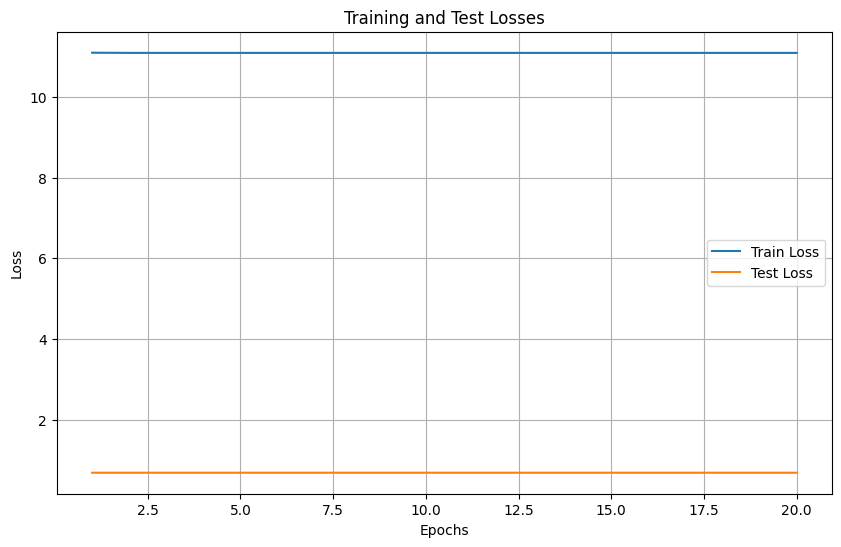

In [25]:
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


# Define Training and Testing Functions
def train(model, device, train_loader, optimizer, epoch, train_losses):
    model.train()
    running_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()                  # zero the gradients
        output = model(data)                   # forward pass
        loss = loss_function(output, target)   # calculate loss
        loss.backward()                        # backpropagation
        optimizer.step()                       # update weights
        running_loss += loss.item()
        if batch_idx % 10 == 0:                # log every 10 batches
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    
    # calculate average loss for epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    return epoch_loss


def test(model, device, test_loader, test_losses):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)                                             # forward pass
            test_loss += loss_function(output, target).item()                # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)                        # get index of max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()            # count correct predictions

    test_loss /= len(test_loader.dataset)                                    # average loss
    test_losses.append(test_loss)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')
    return test_loss

#########################################################################

input_size = len(training_set[0][0]) # 99
batch_size = 16                      # default = 16
num_epochs = 20                      # default = 20
learning_rate = 0.001                # default = 0.001

# Initialize the Model, Optimizer, and DataLoader
model = Net(input_size).to(device)
optimizer = SGD(model.parameters(), lr = learning_rate)
loss_function = torch.nn.BCELoss(reduction='sum')
train_dataloader = DataLoader(training_set,                 
                              batch_size = batch_size,       
                              shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=False)

train_losses = []
test_losses = []

# Run Training and Testing Loops
for epoch in range(1, num_epochs + 1):
    train_loss = train(model, device, train_dataloader, optimizer, epoch, train_losses)
    test_loss = test(model, device, test_dataloader, test_losses)

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.grid(False)
plt.show()

---

## Part 3: Visualize and Interpret Loss Curves

**Tasks**:
1. Plot the training and test loss curves.
2. Answer the following questions:
   - Is the model underfitting, overfitting, or neither? Provide evidence.
   - If overfitting occurs, at what epoch does it begin?
   - What can you infer about the model's performance from the loss curves?

In [8]:
# your code here

---

## Part 4: Experimentation with Hyperparameters

**Experiment**: Varying model capacity
- Now train models with different hidden layer sizes (width & depth):
  - **Smaller model:** 
    - Try architectures will LESS representation capacity than we had initially
  - **Larger model:** 
    - Try architectures will MORE representation capacity than we had initially

- Train each of those architectures, with the same initial learning rate, 20 epochs each and plot their loss curves.

**Questions:**
1. How does changing the model size affect training and test loss?
2. What interesting findings have you found? Prepare to present and share with your classmates (just show the loss curves and explain your findings).

In [9]:
# your code here

---
## Part 5: Experimentation with learning rate


**Experiment**: Periodic reduction of learning rate
- During class we learned that dropping the learning rate, after a period of training, could lead to better results. Can we try to replicate that?

**Question:**
1. Did you succeed? If so, why did it work?


In [10]:
# your code here